<a href="https://www.kaggle.com/code/tmadjid/telecom-churn-eda?scriptVersionId=140569828" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import seaborn as sns  # For KDE overlay

plt.style.use("seaborn-v0_8-pastel")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN   

In [3]:
df = df.rename(lambda x: x.lower().replace(' ','_') , axis='columns')
df

customer_id  gender  age married  number_of_dependents          city  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      zip_code   latitude   longitude  number_of_referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       payment_method monthly_charge total_charges  total_refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     total_extra_data_charges total_long_distance_charges total_revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      customer_status   churn_category                   churn_reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              7043 non-null   objec

In [5]:
df.isnull().sum()[df.isnull().sum() >0]

avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                     1526
streaming_music                      1526
unlimited_data                       1526
churn_category                       5174
churn_reason                         5174
dtype: int64

In [6]:
df.unlimited_data.unique()

array(['Yes', 'No', nan], dtype=object)

In [7]:
df['monthly_charge'] = np.where(df['monthly_charge'] <= 0,
                                df['total_charges'] / df['tenure_in_months'],
                                df['monthly_charge'])

# **Costumer status**

In [8]:
status = df.customer_status.value_counts()

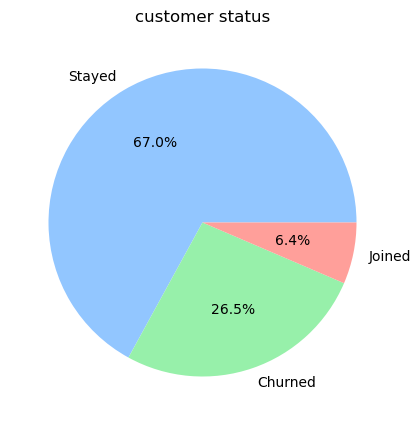

In [9]:
plt.figure(figsize=(10,5))
plt.title('customer status')
plt.pie(status.values , labels = status.keys(), autopct='%1.1f%%') 
#plt.bar_label(plt.bar(status.keys() ,status.values)) 
plt.show()

# **Stayed customers**

In [10]:
ds = df[df.customer_status == 'Stayed']
ds

customer_id  gender  age married  number_of_dependents          city  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
5     0013-MHZWF  Female   23      No                     3      Midpines   
6     0013-SMEOE  Female   67     Yes                     0        Lompoc   
7     0014-BMAQU    Male   52     Yes                     0          Napa   
...          ...     ...  ...     ...                   ...           ...   
7034  9978-HYCIN    Male   72     Yes                     1   Bakersfield   
7035  9979-RGMZT  Female   20      No                     0   Los Angeles   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      zip_code   latitude   longitude  number_of_referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
5        95345  37.581496 -119.972762                    0  ...   
6        93437  34.757477 -120.550507                    1  ...   
7        94558  38.489789 -122.270110                    8  ...   
...        ...        ...         ...                  ...  ...   
7034     93301  35.383937 -119.020428                    1  ...   
7035     90022  34.023810 -118.156582                    0  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       payment_method monthly_charge total_charges  total_refunds  \
0         Credit Card      65.600000        593.30           0.00   
1         Credit Card      60.266667        542.40          38.33   
5         Credit Card      69.400000        571.45           0.00   
6     Bank Withdrawal     109.700000       7904.25           0.00   
7         Credit Card      84.650000       5377.80           0.00   
...               ...            ...           ...            ...   
7034  Bank Withdrawal      84.950000       4018.05           0.00   
7035      Credit Card      94.050000        633.45           0.00   
7038      Credit Card      55.150000        742.90           0.00   
7041      Credit Card      67.850000       4627.65           0.00   
7042  Bank Withdrawal      59.000000       3707.60           0.00   

     total_extra_data_charges total_long_distance_charges total_revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
5                           0                      150.93        722.38   
6                           0                      707.16       8611.41   
7                          20                      816.48       6214.28   
...                       ...                         ...           ...   
7034                       80                     1987.63       6085.68   
7035                        0                      255.43        888.88   
7038                        0                      606.84       1349.74   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      customer_status churn_category churn_reason  
0              Stayed            NaN          NaN  
1              Stayed            NaN          NaN  
5              Stayed            NaN          NaN  
6              Stayed            NaN          NaN  
7              Stayed            NaN          NaN  
...               ...            ...          ...  
7034           Stayed            NaN          NaN  
7035           Stayed            NaN          NaN  
7038           Stayed            NaN          NaN  
7041           Stayed    

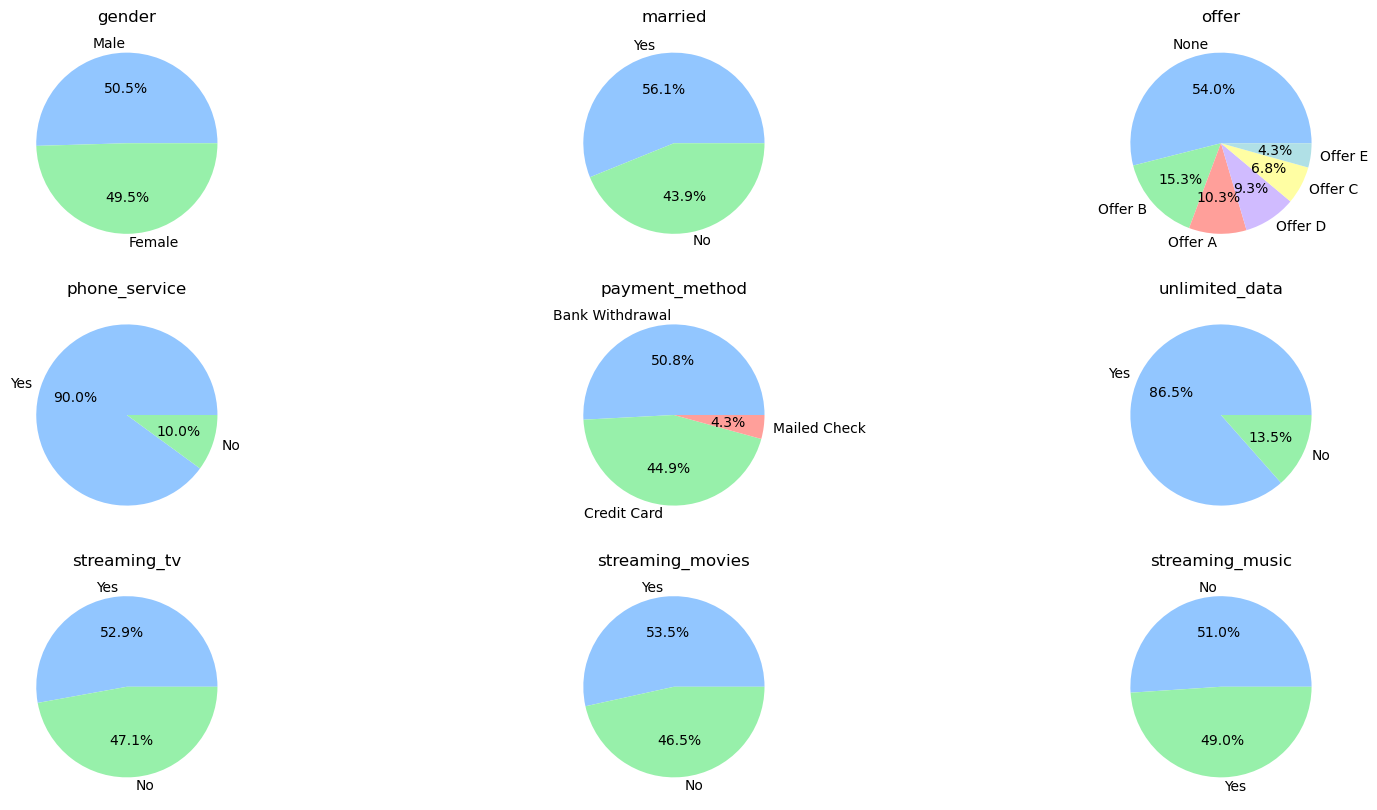

In [11]:
plt.figure(figsize=(20,10))

ky= ['gender','married','offer','phone_service','payment_method','unlimited_data','streaming_tv','streaming_movies','streaming_music']
for index, k in enumerate(ky):
    feature = ds[k].value_counts()
    plt.subplot(3,3,index+1)
    plt.title(k)
    plt.pie(feature.values , labels = feature.keys(), autopct='%1.1f%%') 
    #plt.bar_label(plt.bar(feature.keys() ,feature.values)) 
plt.show()

# **Churned customers**

In [12]:
dc = df[df["customer_status"]=="Churned"]
dc

customer_id  gender  age married  number_of_dependents           city  \
2     0004-TLHLJ    Male   50      No                     0     Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0       Martinez   
4     0013-EXCHZ  Female   75     Yes                     0      Camarillo   
18    0022-TCJCI    Male   79      No                     0      Daly City   
19    0023-HGHWL    Male   67      No                     0    Morgan Hill   
...          ...     ...  ...     ...                   ...            ...   
7020  9961-JBNMK    Male   79      No                     0  Desert Center   
7023  9965-YOKZB    Male   73      No                     0  Grizzly Flats   
7036  9985-MWVIX  Female   53      No                     0           Hume   
7037  9986-BONCE  Female   36      No                     0      Fallbrook   
7039  9992-RRAMN    Male   40     Yes                     0      Riverbank   

      zip_code   latitude   longitude  number_of_referrals  ...  \
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
18       94015  37.680844 -122.481310                    0  ...   
19       95037  37.161544 -121.649371                    0  ...   
...        ...        ...         ...                  ...  ...   
7020     92239  33.889605 -115.257009                    0  ...   
7023     95636  38.636102 -120.522149                    0  ...   
7036     93628  36.807595 -118.901544                    0  ...   
7037     92028  33.362575 -117.299644                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   

       payment_method monthly_charge total_charges  total_refunds  \
2     Bank Withdrawal      73.900000        280.85            0.0   
3     Bank Withdrawal      98.000000       1237.85            0.0   
4         Credit Card      83.900000        267.40            0.0   
18        Credit Card      62.700000       2791.50            0.0   
19    Bank Withdrawal      25.100000         25.10            0.0   
...               ...            ...           ...            ...   
7020  Bank Withdrawal      96.680952       2030.30           10.2   
7023  Bank Withdrawal      83.850000        790.15            0.0   
7036      Credit Card      70.150000         70.15            0.0   
7037  Bank Withdrawal      20.950000         85.50            0.0   
7039  Bank Withdrawal      85.100000       1873.70            0.0   

     total_extra_data_charges total_long_distance_charges total_revenue  \
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
18                          0                      480.15       3271.65   
19                          0                        0.00         25.10   
...                       ...                         ...           ...   
7020                        0                      887.67       2907.77   
7023                        0                       90.36        880.51   
7036                        0                       42.09        112.24   
7037                        0                        8.04         93.54   
7039                        0                      356.40       2230.10   

      customer_status   churn_category                   churn_reason  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
18            Churned  Dissatisfaction      Limited range of services  
19            Churned       Competitor   Competitor made better offer  
...               ...              ...                            ...  
7020          Churned  Dissat

## Churn reasons

In [13]:
reasons = dc.churn_reason.value_counts()

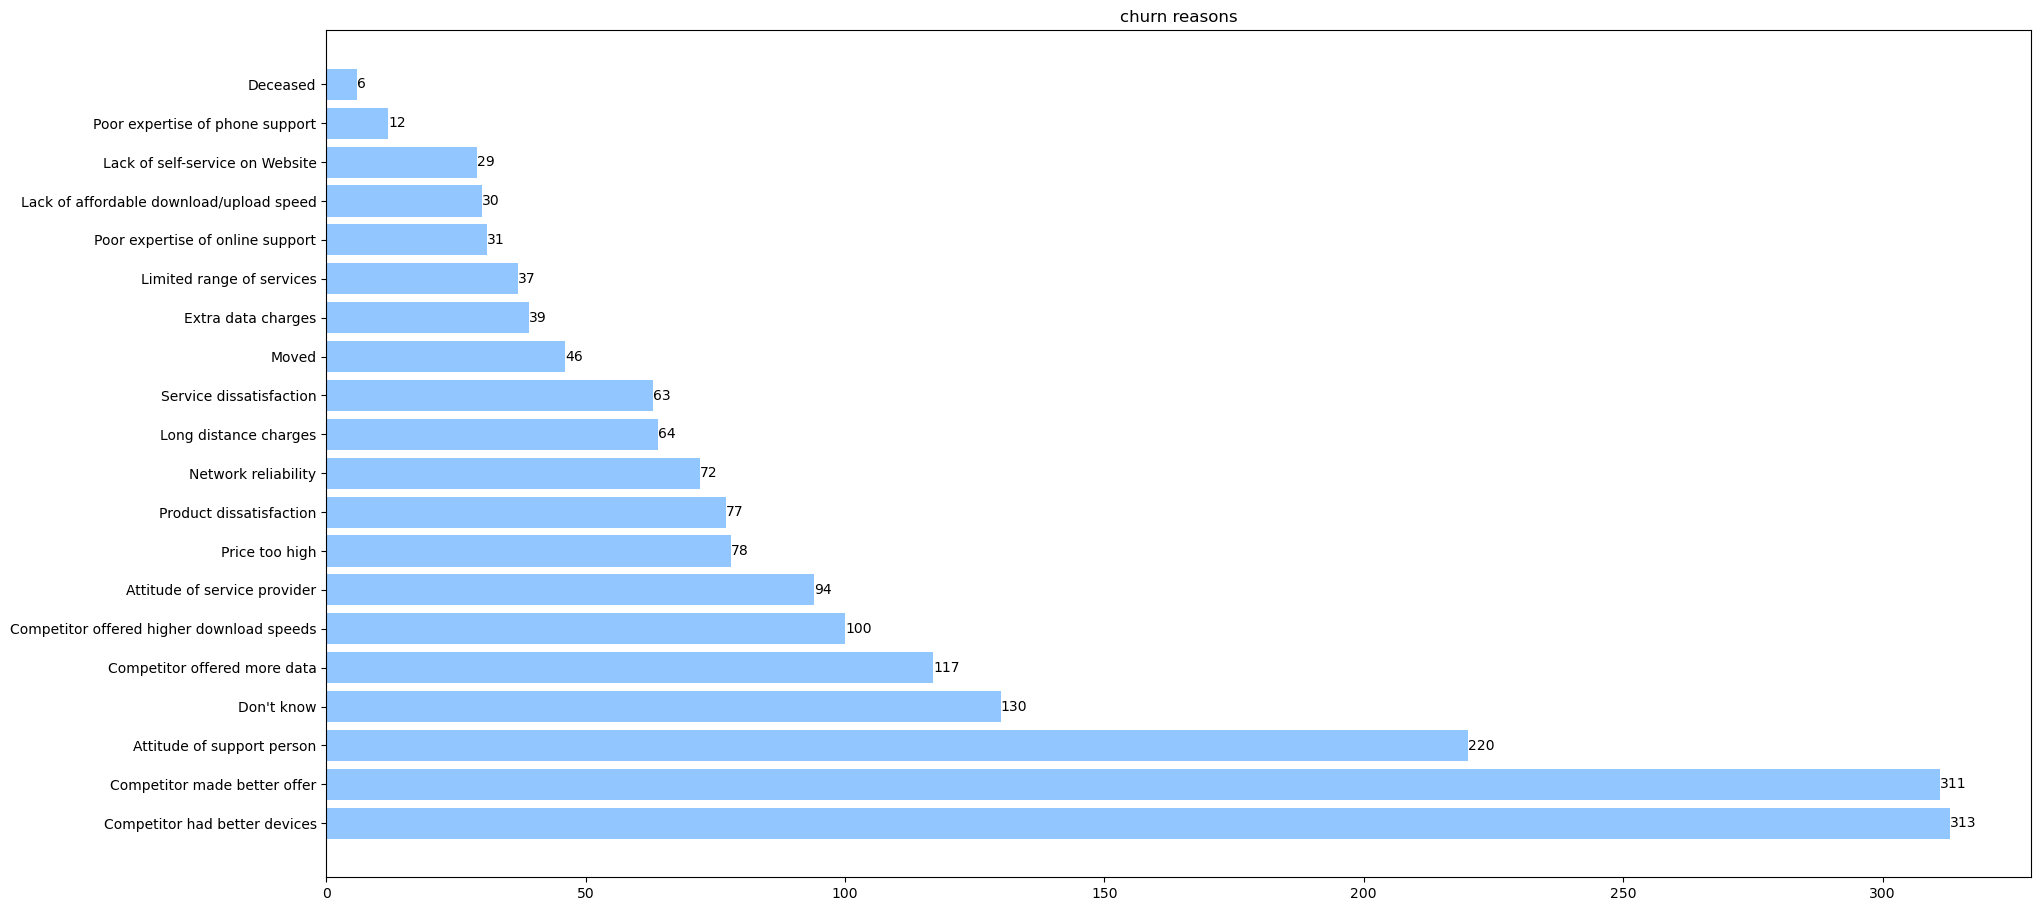

In [14]:
plt.figure(figsize=(22,11))
plt.title('churn reasons')
plt.bar_label(plt.barh(reasons.keys() ,reasons.values)) 
plt.show()

## Churn reasons by category 

In [15]:
reasons_category = dc.churn_category.value_counts()

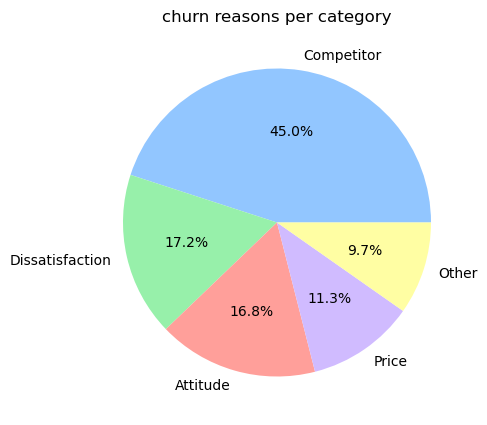

In [16]:
plt.figure(figsize=(15,5))
plt.title('churn reasons per category')
plt.pie(reasons_category.values , labels = reasons_category.keys(), autopct='%1.1f%%') 
plt.show()

## Average tenure of churned customers

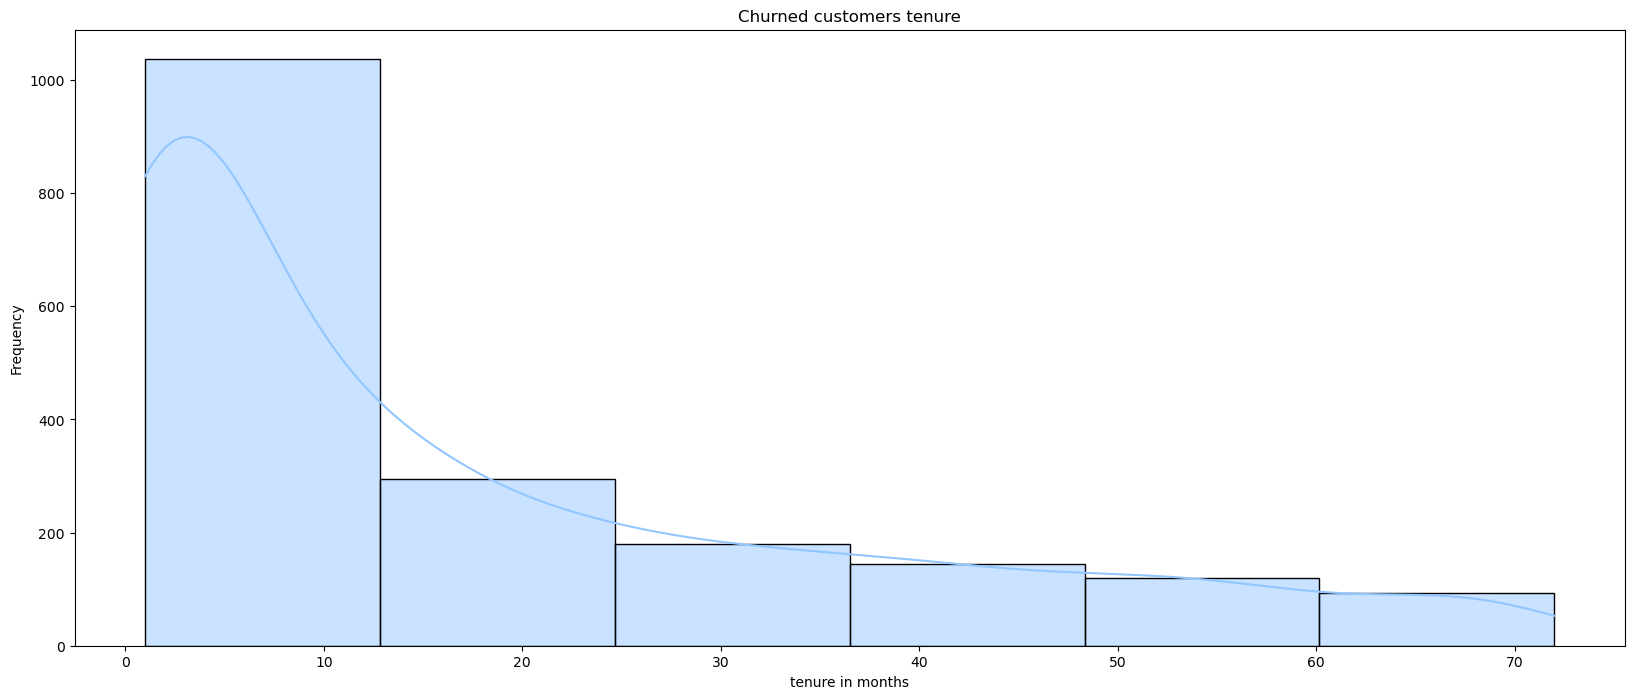

In [17]:
plt.figure(figsize=(20,8))
sns.histplot(dc['tenure_in_months'], bins=6, edgecolor='black', kde=True)  # Adjust the number of bins as needed
plt.title('Churned customers tenure')
plt.xlabel('tenure in months')
plt.ylabel('Frequency')
plt.show()


In [18]:
dc['tenure_in_months'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure_in_months, dtype: float64

### Let's remove outliers

In [19]:
median = np.median(dc.tenure_in_months)
mad= np.median(np.abs(dc.tenure_in_months - median))
dc["modified_z_score"] = 0.6745* (dc.tenure_in_months - median) / mad 
mdc = dc[dc.modified_z_score < 3.5]

/tmp/ipykernel_20/1258938844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc["modified_z_score"] = 0.6745* (dc.tenure_in_months - median) / mad


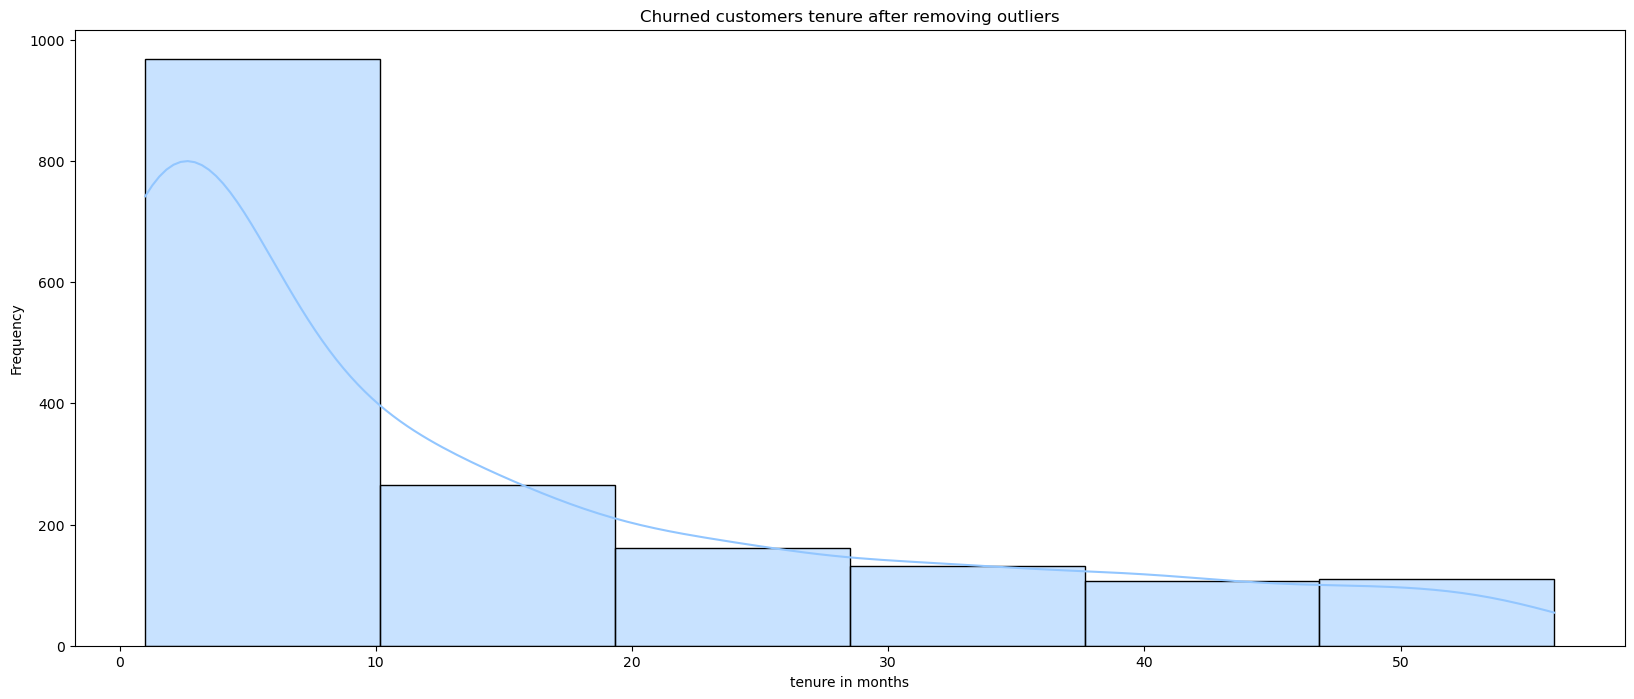

In [20]:
plt.figure(figsize=(20,8))
sns.histplot(mdc['tenure_in_months'], bins=6, edgecolor='black', kde=True)  # Adjust the number of bins as needed
plt.title('Churned customers tenure after removing outliers')
plt.xlabel('tenure in months')
plt.ylabel('Frequency')
plt.show()

In [21]:
mdc.tenure_in_months.describe()

count    1743.000000
mean       14.610442
std        15.462084
min         1.000000
25%         2.000000
50%         8.000000
75%        23.000000
max        56.000000
Name: tenure_in_months, dtype: float64

##### we can see that churned customers tend to quit after 14 months  





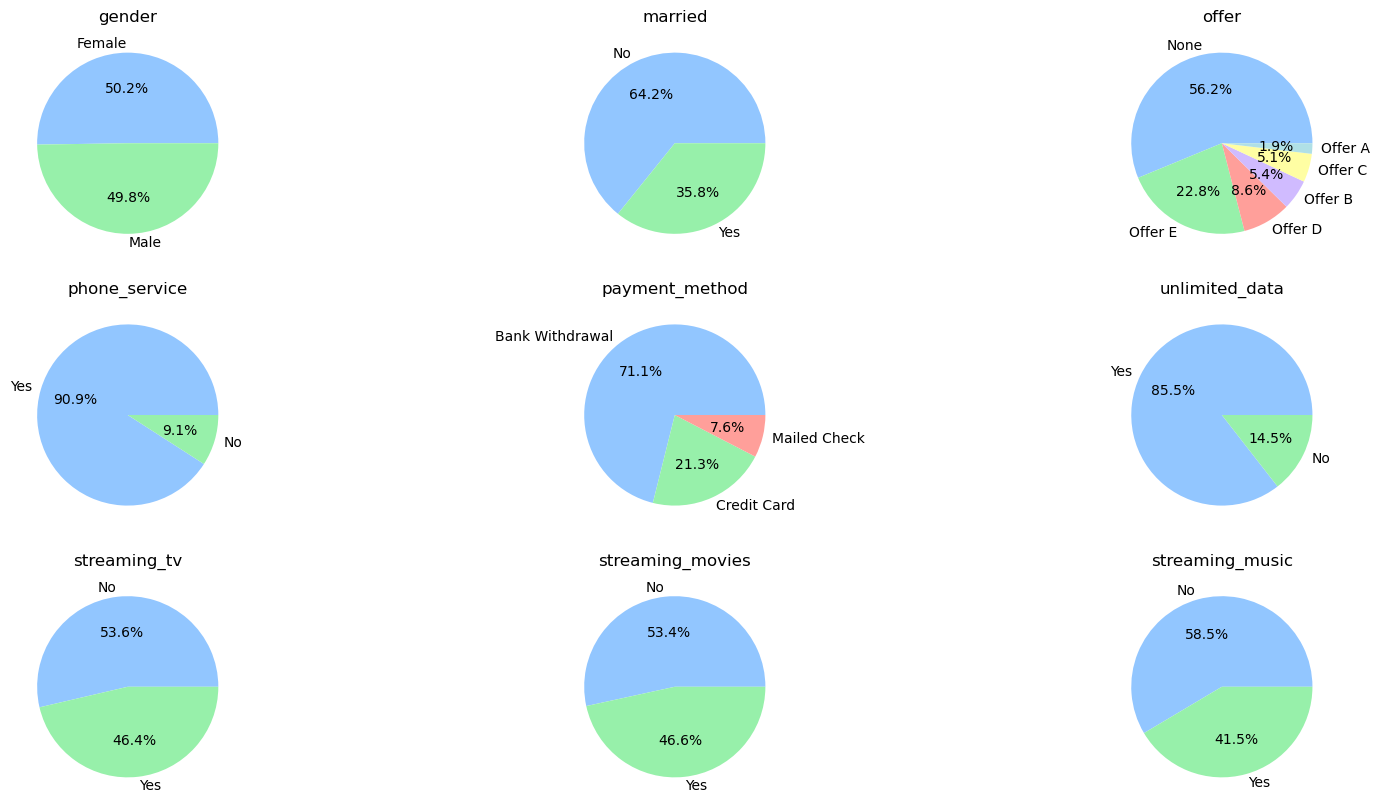

In [22]:
plt.figure(figsize=(20,10))

ky= ['gender','married','offer','phone_service','payment_method','unlimited_data','streaming_tv','streaming_movies','streaming_music']
for index, k in enumerate(ky):
    feature = dc[k].value_counts()
    plt.subplot(3,3,index+1)
    plt.title(k)
    plt.pie(feature.values , labels = feature.keys(), autopct='%1.1f%%') 
    #plt.bar_label(plt.bar(feature.keys() ,feature.values)) 
plt.show()

# Head to head visualization

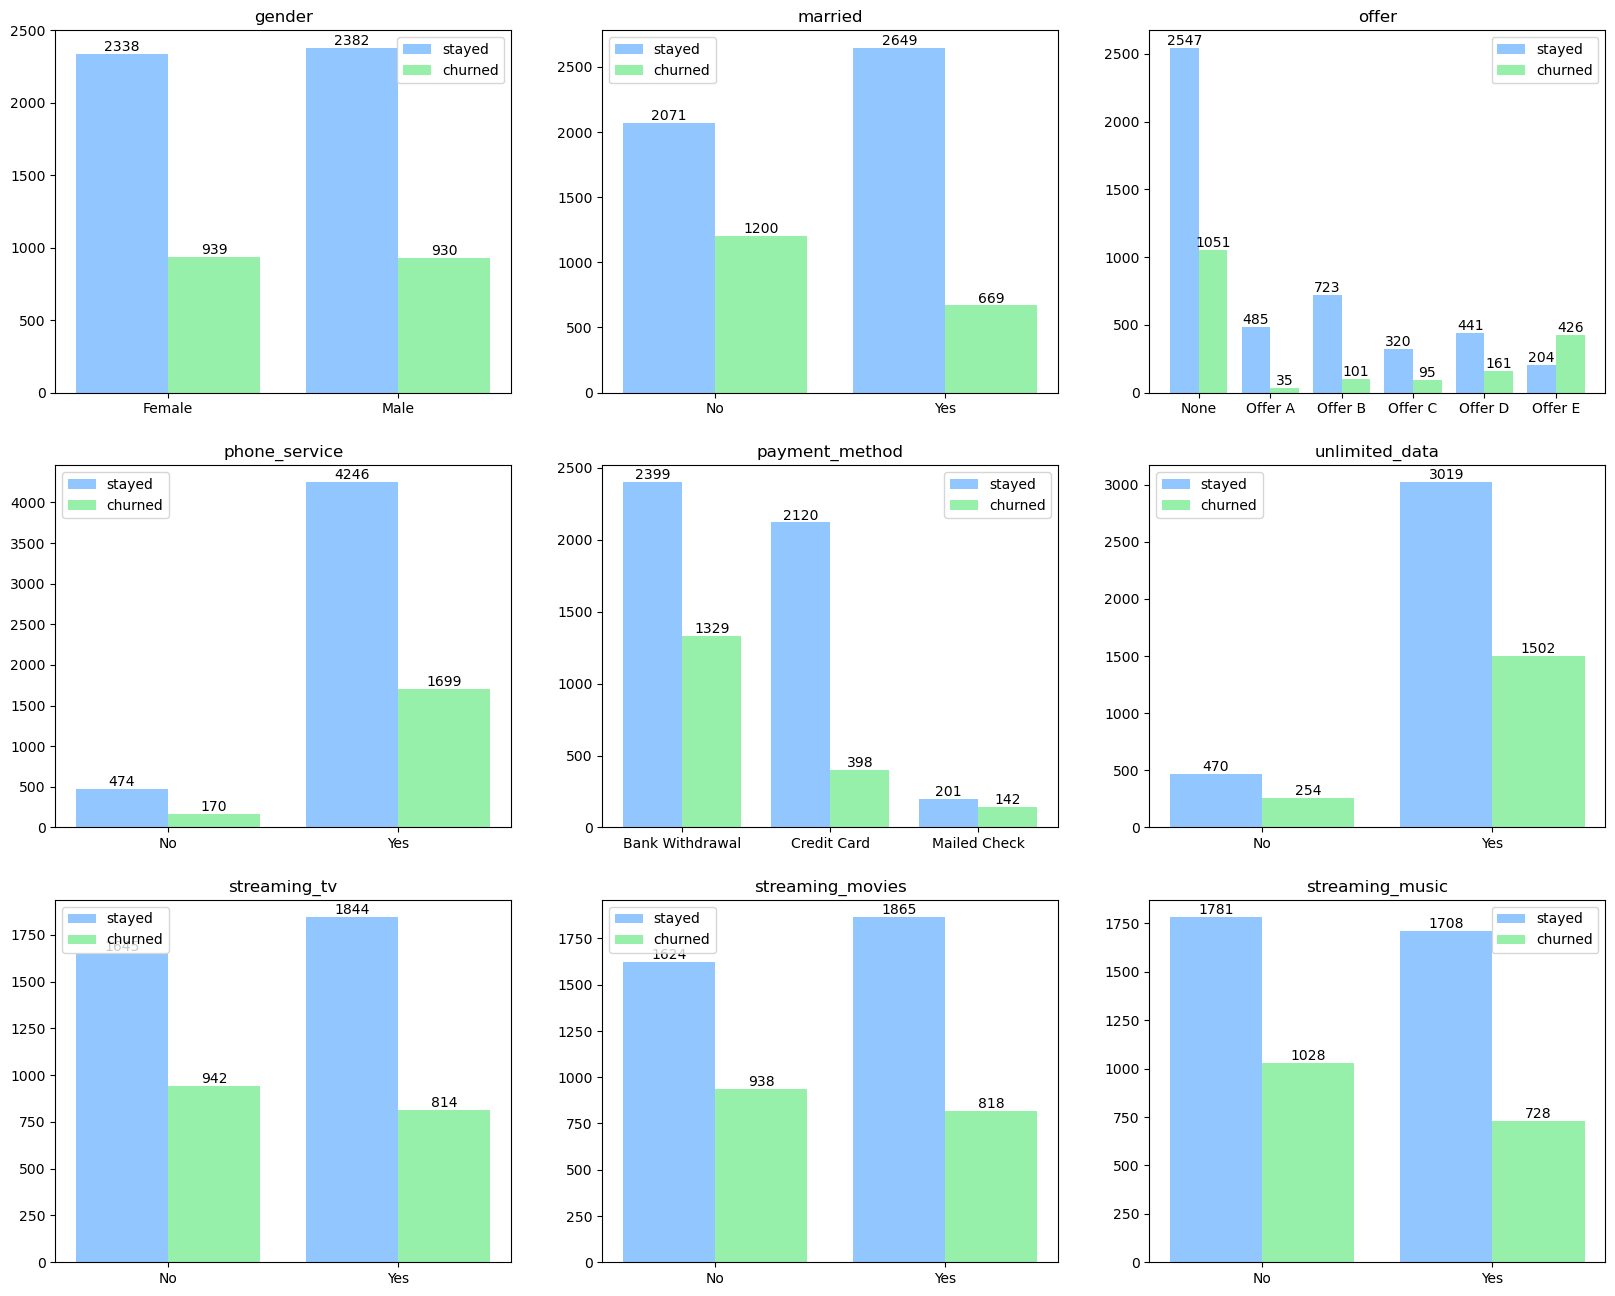

In [23]:
plt.figure(figsize=(20,16))

ky= ['gender','married','offer','phone_service','payment_method','unlimited_data','streaming_tv','streaming_movies','streaming_music']
for index, k in enumerate(ky):
    feature = ds[k].value_counts().sort_index()
    featurec = dc[k].value_counts().sort_index()
    plt.subplot(3,3,index+1)
    plt.title(k)
    xpos = np.arange(len(feature.keys()))
    plt.xticks(xpos,feature.keys())
    plt.bar_label(plt.bar(xpos-0.2 ,feature.values ,label="stayed", width=0.4))
    plt.bar_label(plt.bar(xpos+0.2 ,featurec.values ,label="churned", width=0.4))
    plt.legend()
    #plt.bar_label(plt.bar(feature.keys() ,feature.values)) 
plt.show()



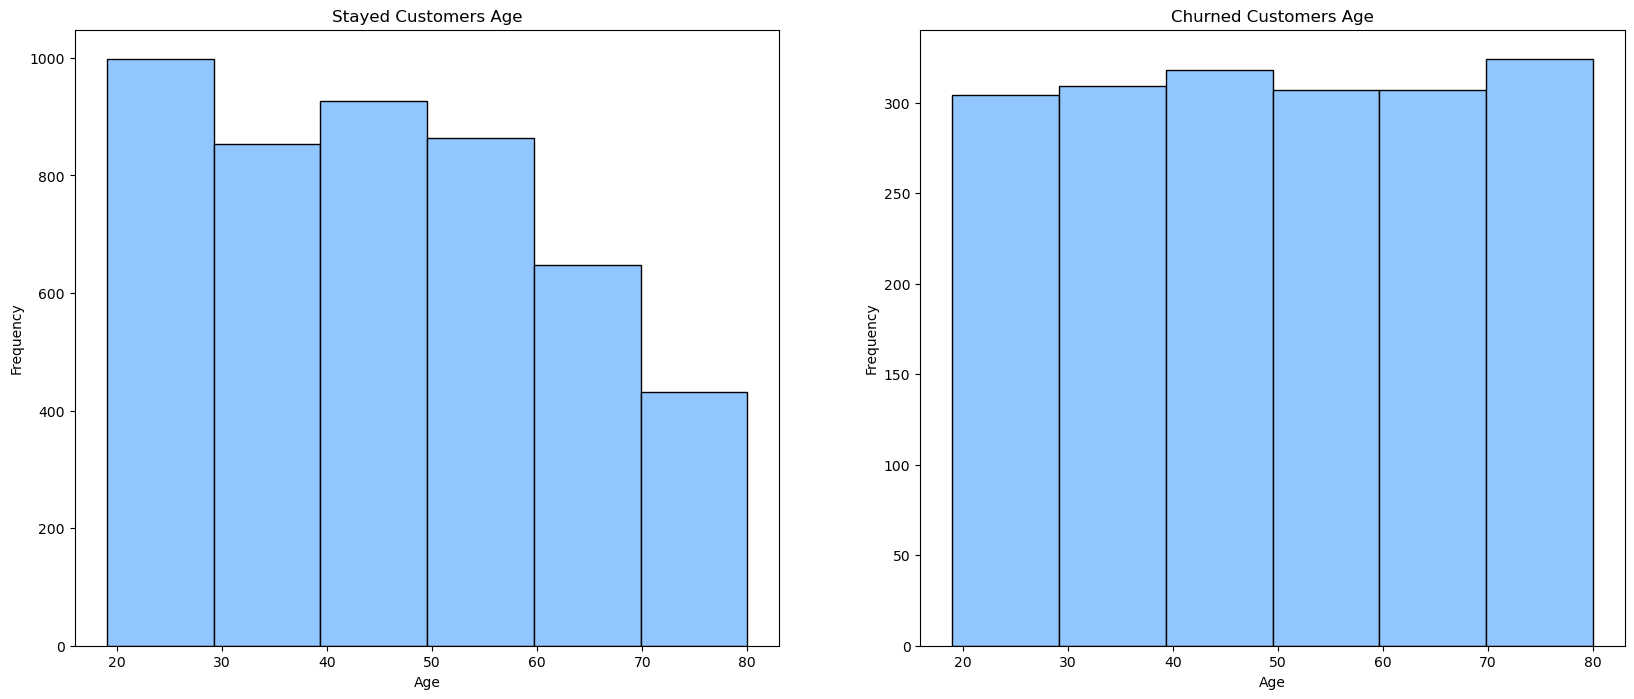

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(ds['age'], bins=6, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Stayed Customers Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(dc['age'], bins=6, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Churned Customers Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the histogram
plt.show()


In [25]:
print("churned monthly charge :", dc['monthly_charge'].mean())
print("stayed monthly charge :", ds['monthly_charge'].mean())

churned monthly charge : 74.4318983188413
stayed monthly charge : 62.97975476968782


#### we can see below  that the average monthly charge of churned customers (74.43) is higher than the customers who stayed (62.98). 


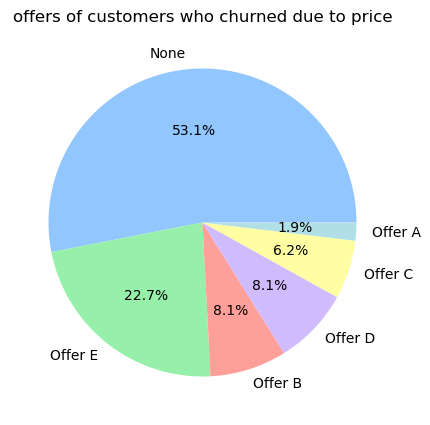

In [26]:
high_price = dc["offer"][dc["churn_category"]=="Price"].value_counts()
plt.figure(figsize=(22,5))
plt.title('offers of customers who churned due to price')
plt.pie(high_price.values ,labels=high_price.keys() , autopct='%1.1f%%') 
plt.show()


In [27]:
m = folium.Map(location=[ds['latitude'].mean(), ds['longitude'].mean()], zoom_start=6)
churned = folium.FeatureGroup(name="churned").add_to(m)
stayed = folium.FeatureGroup(name="stayed").add_to(m)
churned_function = '''
    function(cluster) {
        var childCount = cluster.getChildCount();
        return L.divIcon({
            html: '<div style="display:flex;justify-content:center;align-items:center;background-color: rgba(255, 87, 51,0.5); border-radius: 50%; text-align: center; width: 40px; height: 40px;"><div style="display:flex;justify-content:center;align-items:center;background-color: rgba(255, 87, 51,0.75); border-radius: 50%; text-align: center; width: 28px; height: 28px; color: #111;">' + childCount + '</div></div>',
            className: 'custom-icon'
        });
    }
''';
stayed_function = '''
    function(cluster) {
        var childCount = cluster.getChildCount();
        return L.divIcon({
            html: '<div style="display:flex;justify-content:center;align-items:center;background-color: rgba(87, 255, 51,0.5); border-radius: 50%; text-align: center; width: 40px; height: 40px;"><div style="display:flex;justify-content:center;align-items:center;background-color: rgba(87, 255, 51,0.75); border-radius: 50%; text-align: center; width: 28px; height: 28px; color: #111;">' + childCount + '</div></div>',
            className: 'custom-icon'
        });
    }
'''

# Create a marker cluster group with the custom icon

churned_cluster = MarkerCluster(icon_create_function=churned_function).add_to(churned)
stayed_cluster = MarkerCluster(icon_create_function=stayed_function).add_to(stayed)

# Add markers for each data point in the DataFrame
for index, row in ds.iterrows(): 
    folium.Circle(location=[row['latitude'], row['longitude']], popup=row['city']).add_to(stayed_cluster) 

for index, row in dc.iterrows(): 
    folium.Circle(location=[row['latitude'], row['longitude']], popup=row['city']).add_to(churned_cluster)    


legend_html = '''
    <div style="position: absolute; top: 60px; right: 10px; background-color: white; border: 1px solid #ccc; padding: 10px; z-index: 1000;">
        <div><b>Legend</b></div>
        <div style="display:flex; flex-direction:row; margin:10px 0;"><div style="background-color: #FF5733;opacity:0.75; b text-align: center; width: 20px; height: 20px;margin:0 2px" ></div>Churned Customers</div>
        <div style="display:flex; flex-direction:row"><div style="background-color: #57FF33;opacity:0.75; b text-align: center; width: 20px; height: 20px;margin:0 2px"></div> Stayed Customers</div>
    </div>
'''


m.get_root().html.add_child(folium.Element( legend_html ))



folium.LayerControl().add_to(m)
m    

# Key Findings
* most customers don't go for offres.
* most customers cancel their subscription because they found better plans at competitors.
* 16.8% of churned customers cancel their subscription because of the attitude the service provider and support person. 
* Offer E experieces the highest churn rate from the available 5 offers and it is the least popular ammong the stayed customers.
* average monthly charge of churned customers is around 11 dollars higher than the one of the customers who stayed which could tell us that offre E is expensive.
* on average, churned customers tend to cancel their subscription after 14 months which may indicates that the service is not too bad but needs constant imporvement 


# Recomendations
*  The marketing team should improve their offers in general, and the offre E in particular.
*  The necessity of addressing the negative attitude problem of the service providers and support personnels by setting warnings, providing training and education, or considering personnel changes if necessary.
